In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Pre-processing

In [2]:
df = pd.read_csv('dataset.csv')

In [3]:
from sklearn.impute import SimpleImputer
import numpy as np

# Imputing missing values for numerical columns with median
num_imputer = SimpleImputer(strategy='median')
df[['LoanAmount', 'Loan_Amount_Term']] = num_imputer.fit_transform(df[['LoanAmount', 'Loan_Amount_Term']])

# Imputing missing values for categorical columns with mode
# First, calculate the mode (most frequent value) for each column
cat_columns = ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Credit_History']
for col in cat_columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Check if there are any missing values left
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [4]:
df["Loan_Status"] = (df["Loan_Status"] == "Y").astype(int)
df = df.drop(columns=["Loan_ID"], axis=1)
# In dependents column, there is a value 3+ which is not a number. So, we need to replace it with a number.
df["Dependents"] = df["Dependents"].replace("3+", 3)
df["Dependents"] = df["Dependents"].astype(float)

In [5]:
# Encode categorical columns
from sklearn.preprocessing import LabelEncoder
cols = ["Gender","Married","Dependents","Education","Self_Employed", "Property_Area"]
le = LabelEncoder()
for col in cols:
    df[col] = le.fit_transform(df[col])
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


# Exploratory Data Analysis

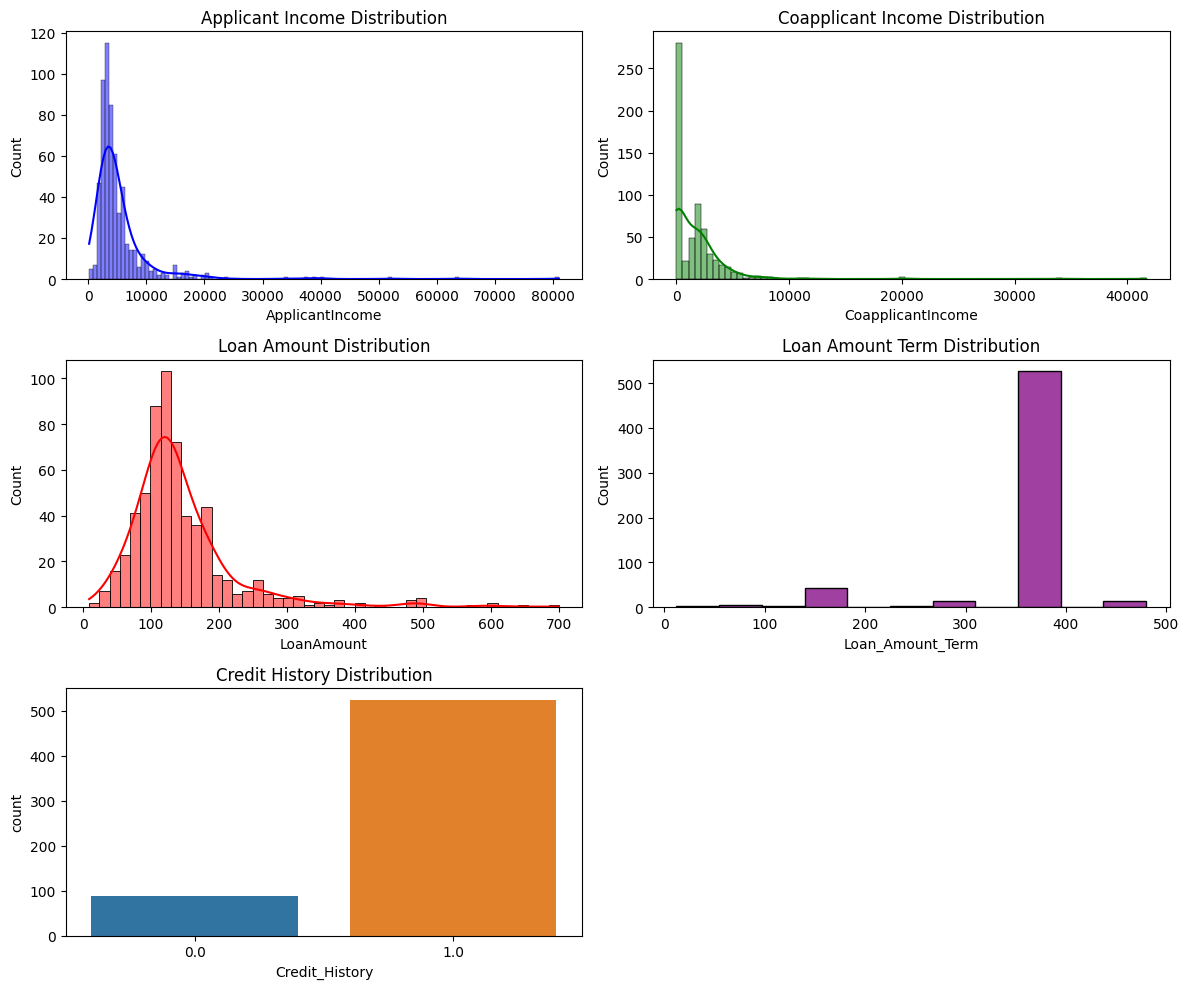

In [6]:
# Setting up the figure size and background color
plt.figure(figsize=(12, 10), facecolor='white')

# Plotting distributions of numerical variables
plt.subplot(3, 2, 1)
sns.histplot(df['ApplicantIncome'], kde=True, color='blue')
plt.title('Applicant Income Distribution')

plt.subplot(3, 2, 2)
sns.histplot(df['CoapplicantIncome'], kde=True, color='green')
plt.title('Coapplicant Income Distribution')

plt.subplot(3, 2, 3)
sns.histplot(df['LoanAmount'], kde=True, color='red')
plt.title('Loan Amount Distribution')

plt.subplot(3, 2, 4)
sns.histplot(df['Loan_Amount_Term'], kde=False, color='purple')
plt.title('Loan Amount Term Distribution')

plt.subplot(3, 2, 5)
sns.countplot(x='Credit_History', data=df)
plt.title('Credit History Distribution')

plt.tight_layout()
plt.show()

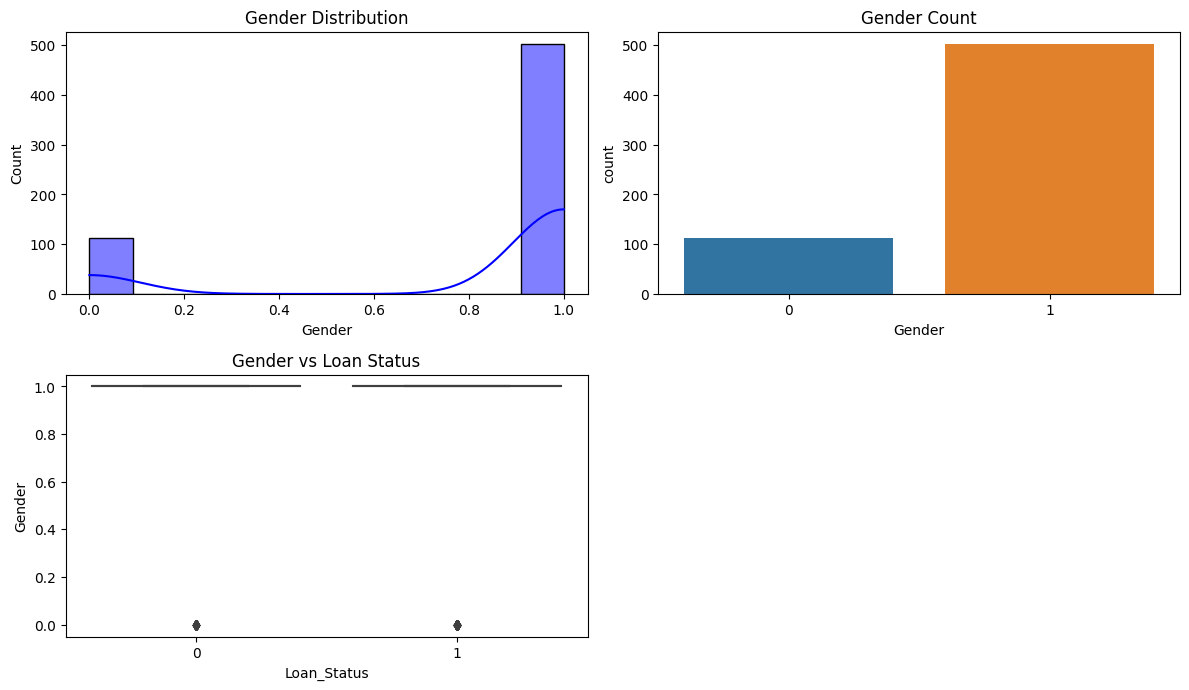

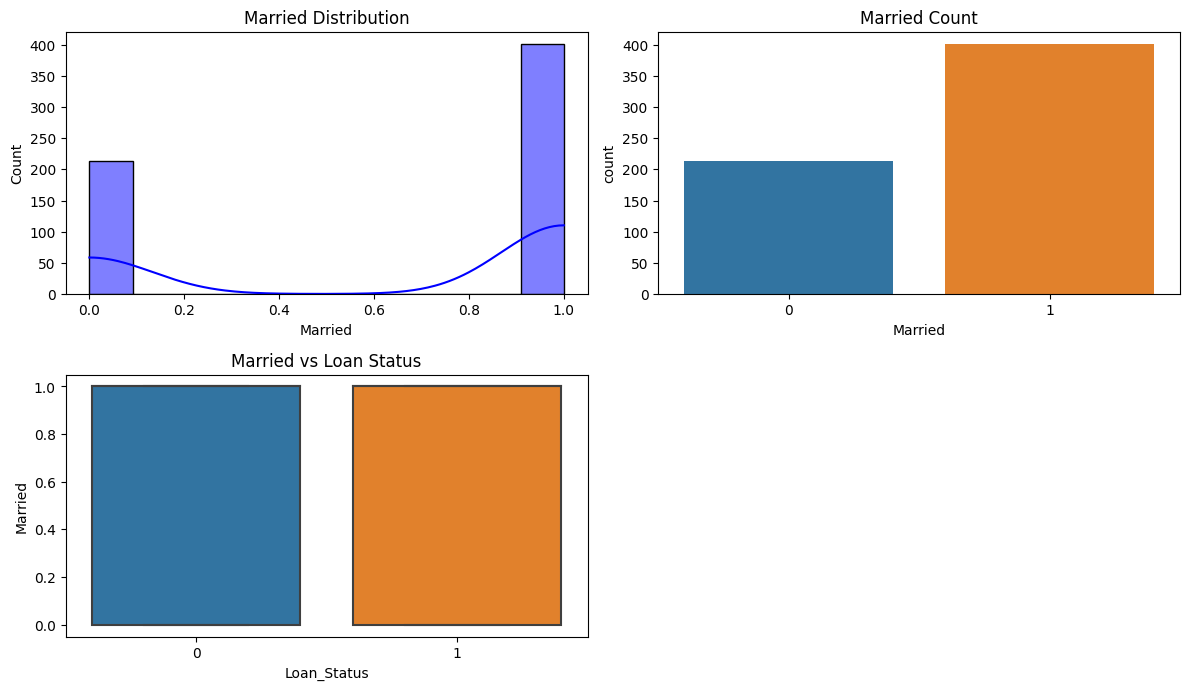

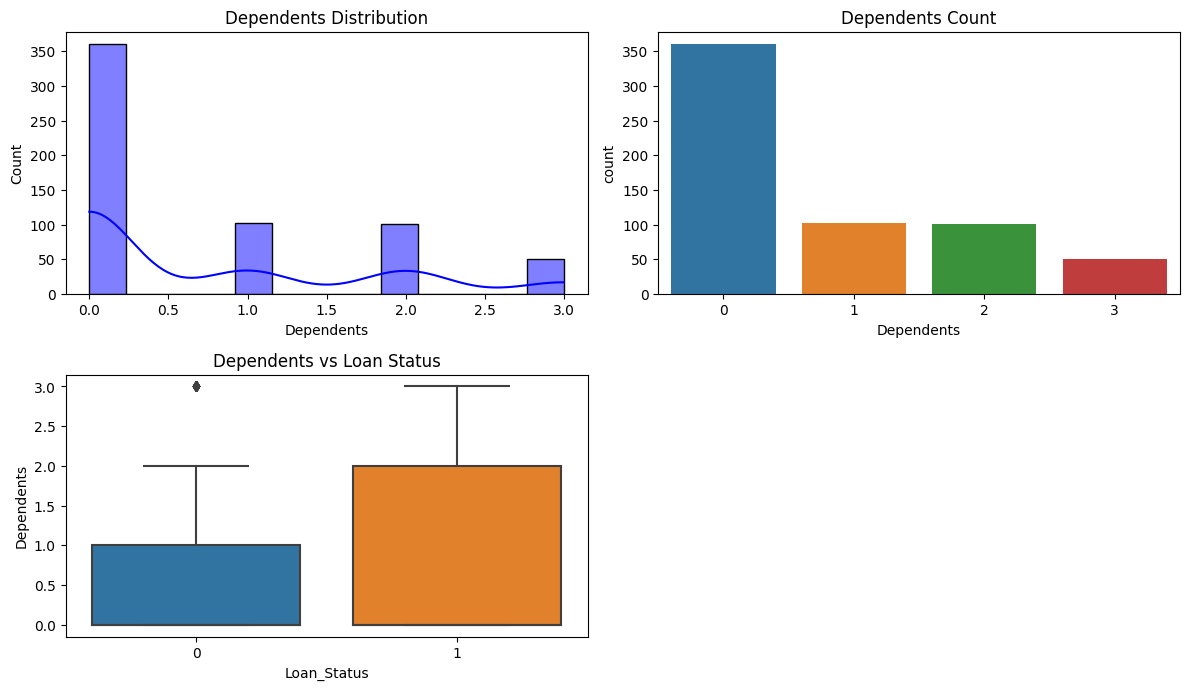

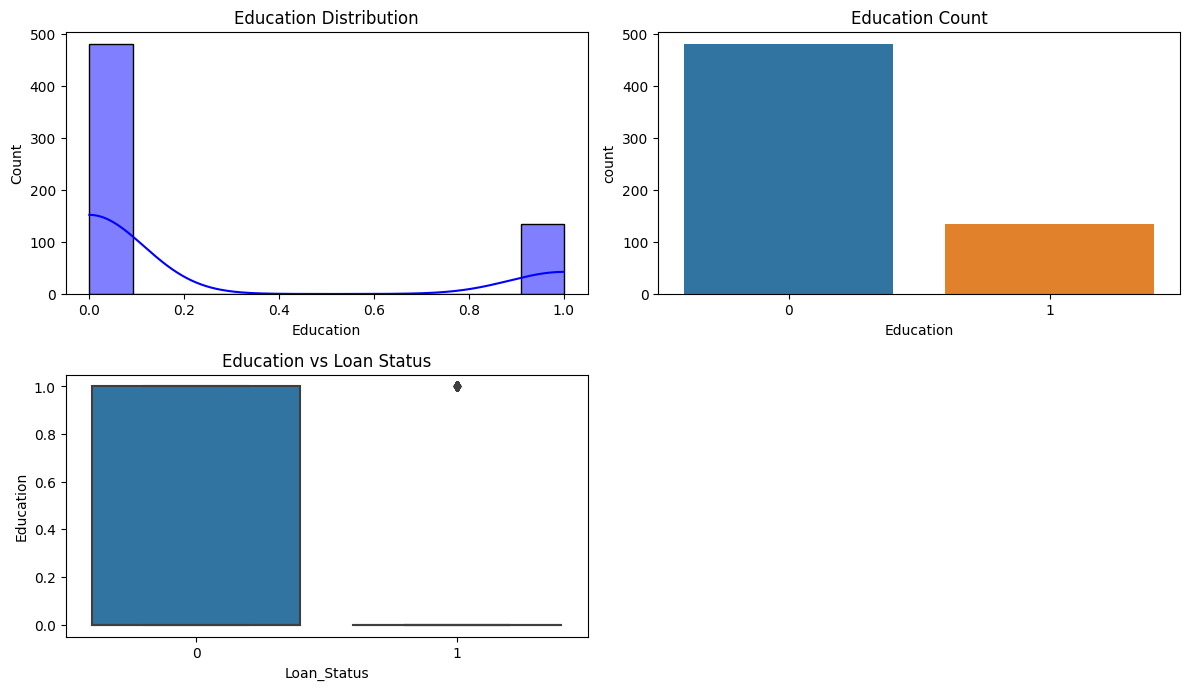

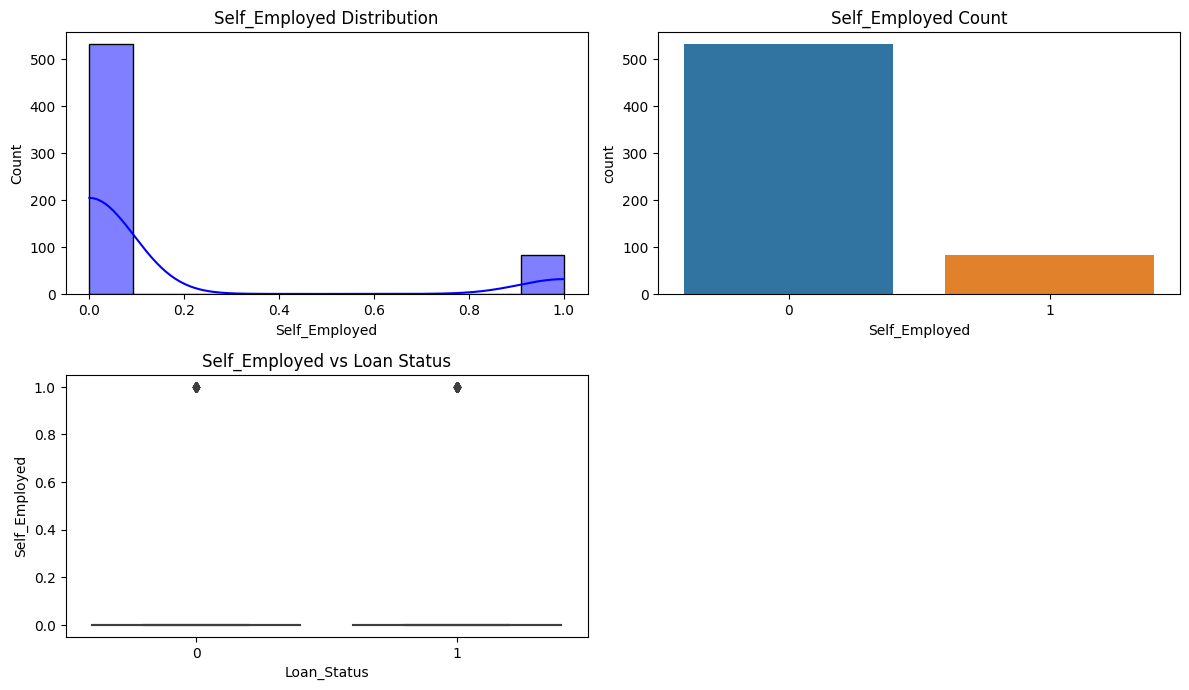

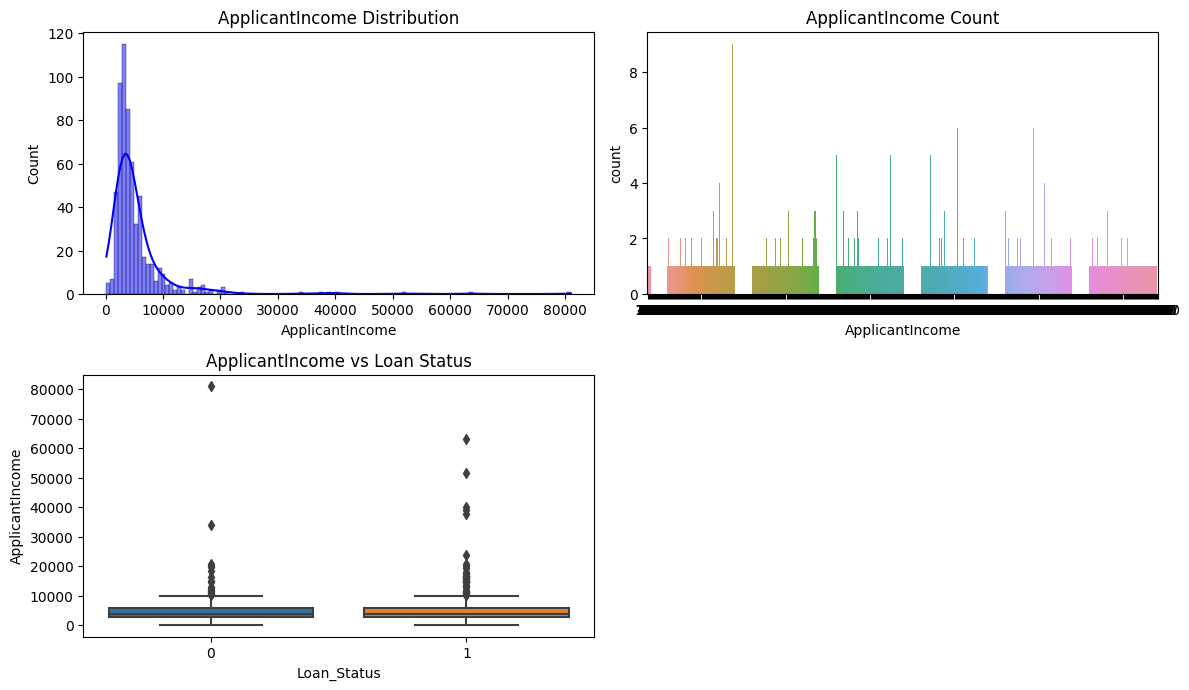

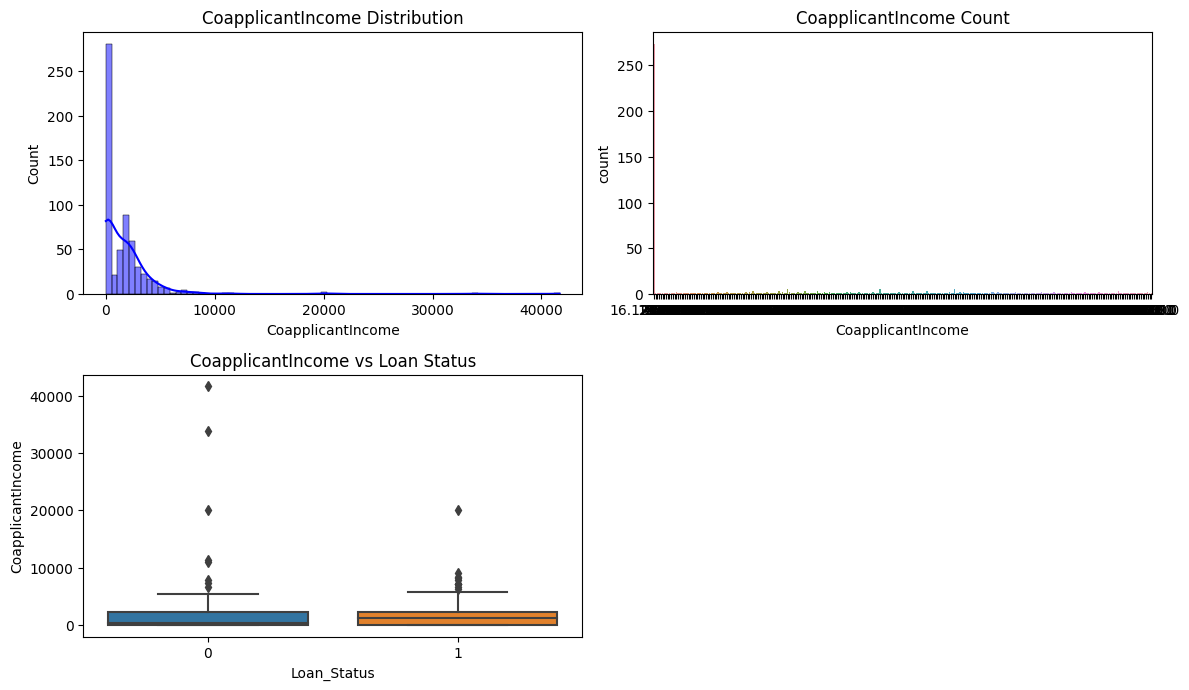

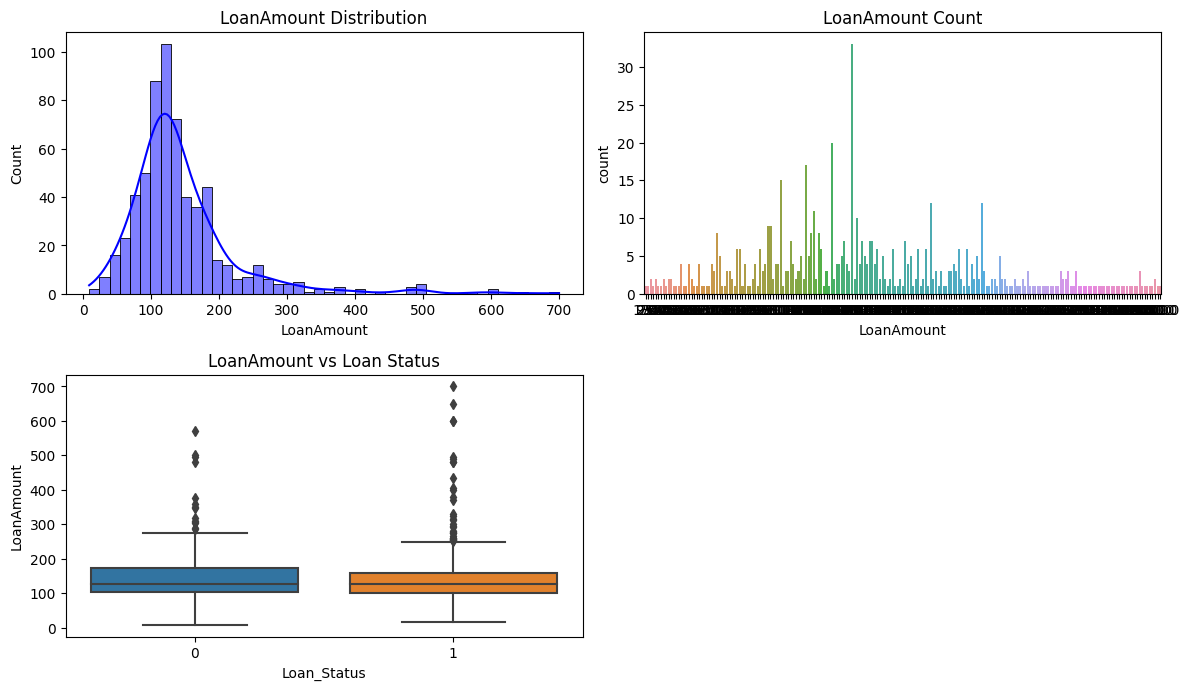

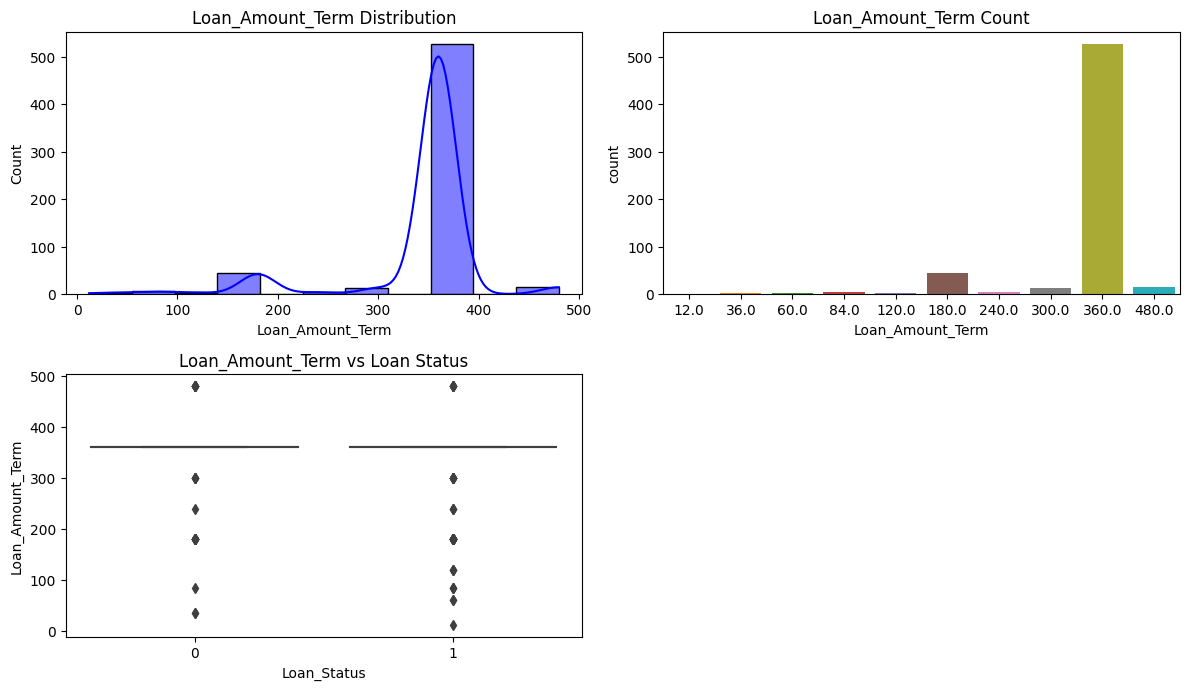

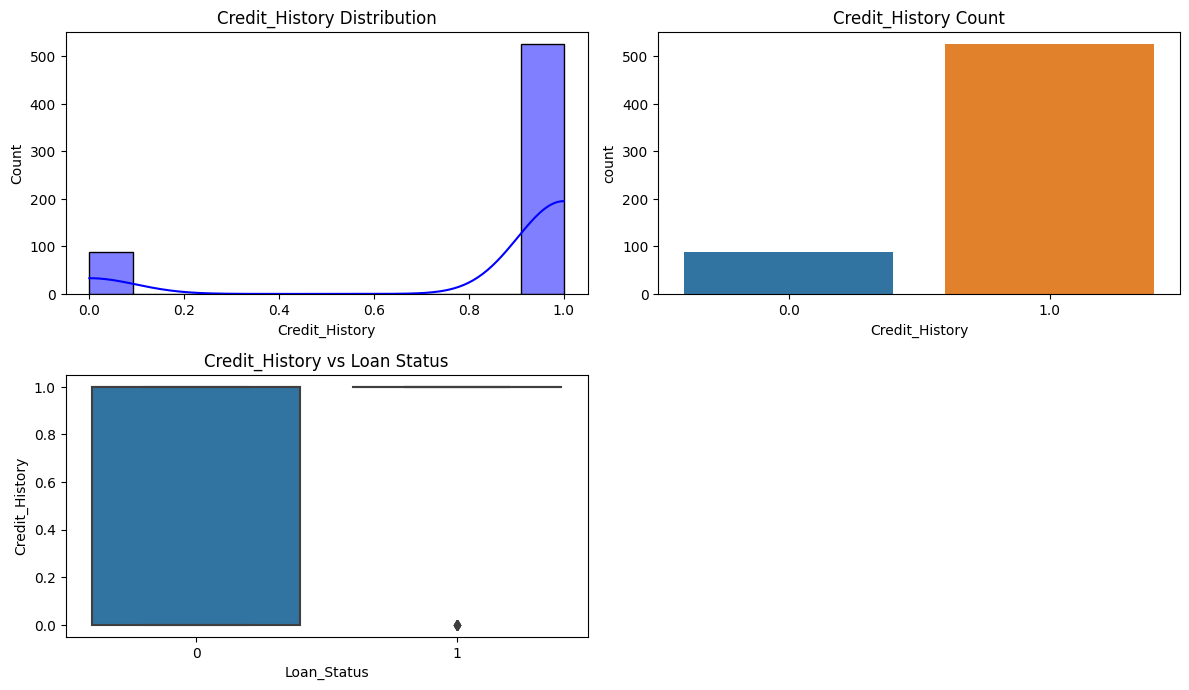

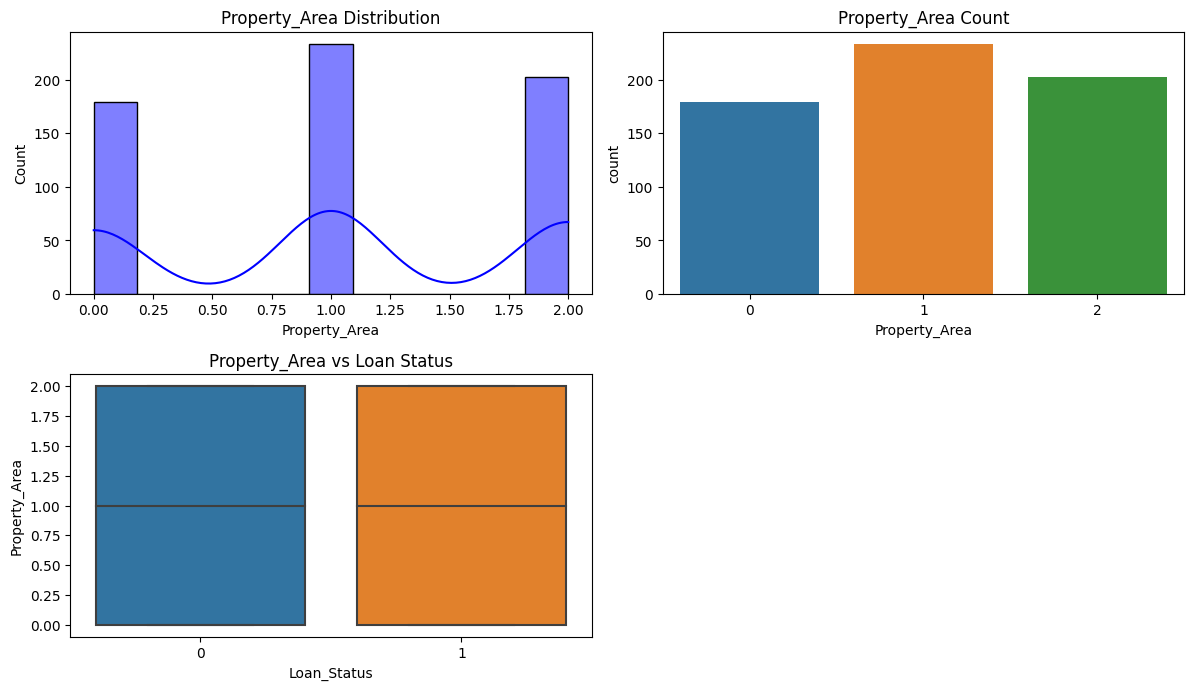

In [7]:
for label in df.columns[:-1]:
  #plot 3 different plots for each feature in one row

  # Setting up the figure size and background color
  plt.figure(figsize=(12, 10), facecolor='white')

  # Plotting distributions of numerical variables
  plt.subplot(3, 2, 1)
  sns.histplot(df[label], kde=True, color='blue')
  plt.title(label + ' Distribution')

  plt.subplot(3, 2, 2)
  sns.countplot(x=label, data=df)
  plt.title(label + ' Count')

  plt.subplot(3, 2, 3)
  sns.boxplot(x='Loan_Status', y=label, data=df)
  plt.title(label + ' vs Loan Status')

  plt.tight_layout()
  plt.show()


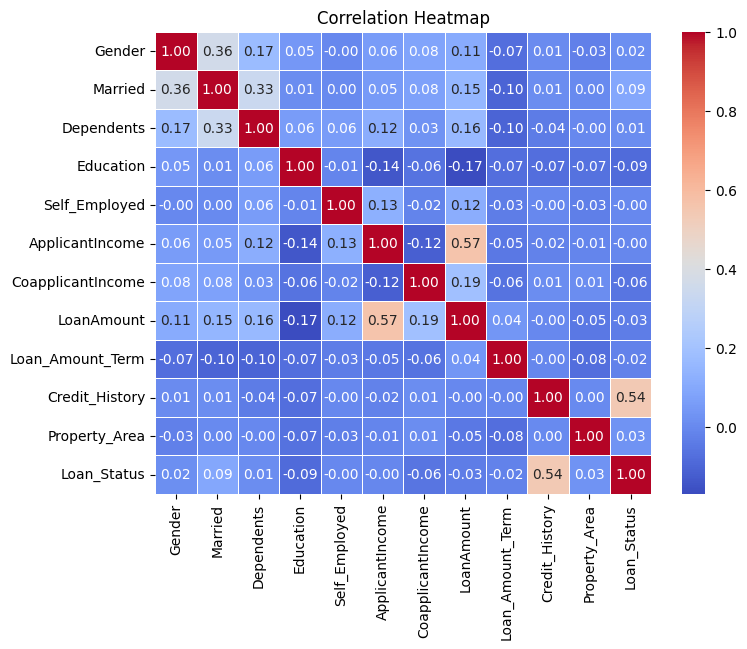

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
corr_matrix = df.corr()
# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# Plot histograms for numerical variables
numerical_vars = df.select_dtypes(include=['int64', 'float64']).columns
for var in numerical_vars:
    sns.histplot(df[var])
    plt.title(f'Histogram of {var}')
    plt.show()

# Plot count plots for categorical variables
categorical_vars = df.select_dtypes(include=['object']).columns
for var in categorical_vars:
    sns.countplot(data=df, x=var)
    plt.title(f'Count plot of {var}')
    plt.show()

In [ ]:
# Plot boxplots for numerical variables against loan prediction
for var1 in numerical_vars:
    sns.boxplot(data=df, x='Loan_Status', y=var1)
    plt.title(f'Boxplot of {var1} by Loan Status')
    
    plt.show()

# Plot bar plots for categorical variables against loan prediction
for var1 in categorical_vars:
    sns.countplot(data=df, x=var1, hue='Loan_Status')
    plt.title(f'Bar plot of {var1} by Loan Status')
    plt.show()


In [ ]:
for column in df.columns:
    if column != 'Loan_Status' and column != 'Loan_ID' and column != 'ApplicantIncome' and column != 'LoanAmount' and column!='coapplicantIncome':
        plt.figure(figsize=(8, 6))
        sns.countplot(data=df, x=column, hue='Loan_Status')
        plt.title(f'Count plot of Loan_Status by {column}')
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.legend(title='Loan_Status', loc='upper right')
        plt.show()

# Prediction

- Logistic Regression
- Naive Bayes
- Random Forest

  

In [12]:

from sklearn.model_selection import train_test_split

X=df.iloc[:,:-1]
y=df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [13]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

LRclassifier = LogisticRegression(solver='saga', max_iter=500, random_state=10)
LRclassifier.fit(X_train, y_train)

y_pred = LRclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
LRAcc = accuracy_score(y_test, y_pred)
print('LR accuracy: {:.2f}%'.format(LRAcc*100))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        61
           1       0.67      1.00      0.80       124

    accuracy                           0.67       185
   macro avg       0.34      0.50      0.40       185
weighted avg       0.45      0.67      0.54       185

[[  0  61]
 [  0 124]]
LR accuracy: 67.03%


c:\Users\Mitkumar Paul\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Mitkumar Paul\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mitkumar Paul\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mitkumar Paul\AppData\Local\Programs\Python\Python39\lib\site-packages\s

In [14]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [15]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB

GB=GaussianNB()
GB.fit(X_train,y_train)

GaussianNB()

In [16]:
pred_GB =GB.predict(X_test)
pred_GB

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1])

In [17]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt
precision = precision_score(y_test, pred_GB)
recall = recall_score(y_test, pred_GB)
accuracy = accuracy_score(y_test, pred_GB)
f1 = f1_score(y_test, pred_GB)

print("Precision:", precision)
print("Recall:", recall)
print("Accuracy:", accuracy)
print("F1 Score:", f1)

Precision: 0.7777777777777778
Recall: 0.9596774193548387
Accuracy: 0.7891891891891892
F1 Score: 0.8592057761732852


In [20]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators=200, random_state=1, max_leaf_nodes=10)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)
precision = precision_score(y_test, y_pred)
print("Precision: ", precision)

Accuracy:  0.7945945945945946
Precision:  0.7721518987341772
